In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
df = pd.read_csv("bmi.csv")

In [4]:
df

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


This data frame contains the following columns:

- Gender : Male / Female
- Height : Number (cm)
- Weight : Number (Kg)
- Index :
   - 0 - Extremely Weak
   - 1 - Weak
   - 2 - Normal
   - 3 - Overweight
   - 4 - Obesity
   - 5 - Extreme Obesity

In [16]:
df.shape

(500, 4)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [18]:
df.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [19]:
iqr= 184 -156
iqr

28

In [20]:
156-1.5*28

114.0

In [21]:
184+1.5*28

226.0

In [22]:
from scipy.stats import skew
mean_height = np.mean(df['Height'])
std_height = np.std(df['Height'], ddof=1)  # Using ddof=1 for sample std

# Step 2: Calculate the skewness manually
n = len(df['Height'])
skew_manual = (n / ((n - 1) * (n - 2))) * np.sum(((df['Height'] - mean_height) / std_height) ** 3)

print(f"Manual Skewness: {skew_manual:.4f}")
skew_scipy = skew(df['Height'], bias=False)  # bias=False ensures unbiased estimate
print(f"SciPy Skewness: {skew_scipy:.4f}")

Manual Skewness: -0.1219
SciPy Skewness: -0.1219


In [23]:
mean_height = np.mean(df['Weight'])
std_height = np.std(df['Weight'], ddof=1)  # Using ddof=1 for sample std

# Step 2: Calculate the skewness manually
n = len(df['Weight'])
skew_manual = (n / ((n - 1) * (n - 2))) * np.sum(((df['Weight'] - mean_height) / std_height) ** 3)

print(f"Manual Skewness: {skew_manual:.4f}")

Manual Skewness: -0.0377


In [24]:
plt.hist(df['Height'])

NameError: name 'plt' is not defined

Mean: 169.94
Median: 170.50
Skewness: -0.1219


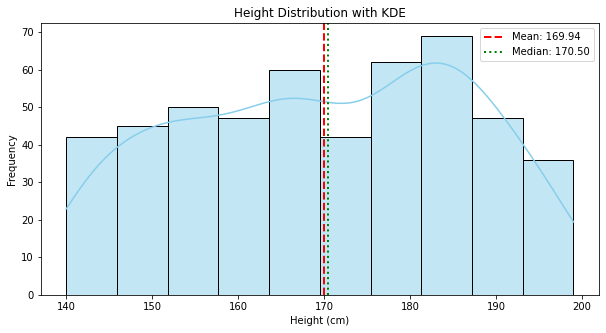

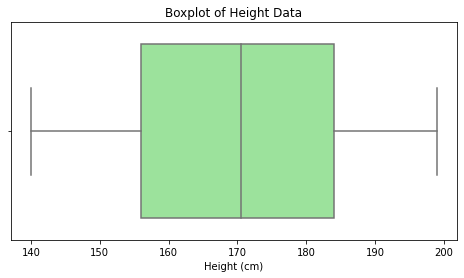

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# Step 1: Calculate mean, median, and skewness
mean_height = np.mean(df["Height"])
median_height = np.median(df["Height"])
skewness = skew(df["Height"], bias=False)

# Print results for clarity
print(f"Mean: {mean_height:.2f}")
print(f"Median: {median_height:.2f}")
print(f"Skewness: {skewness:.4f}")

# Step 2: Plot Histogram with Mean and Median
plt.figure(figsize=(10, 5))
sns.histplot(df["Height"], bins=10, kde=True, color='skyblue', edgecolor='black')
plt.axvline(mean_height, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_height:.2f}')
plt.axvline(median_height, color='green', linestyle='dotted', linewidth=2, label=f'Median: {median_height:.2f}')
plt.title('Height Distribution with KDE')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Step 3: Plot Boxplot to Check Outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=df["Height"], color='lightgreen')
plt.title('Boxplot of Height Data')
plt.xlabel('Height (cm)')
plt.show()
#slight negative skew

In [16]:
#boxplot for all features
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
num_columns = len(numeric_columns)

n_cols = math.ceil(math.sqrt(num_columns))  
n_rows = math.ceil(num_columns / n_cols)    
fig, axs = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(5 * n_cols, 5 * n_rows))
index = 0
axs = axs.flatten()
for index, k in enumerate(numeric_columns):
    sns.boxplot(y=k, data=df, ax=axs[index])
    axs[index].set_title(f'Boxplot of {k}') 
    axs[index].set_xlabel(k)  

for i in range(len(numeric_columns), len(axs)):
    axs[i].set_visible(False)

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

NameError: name 'math' is not defined

Mean: 106.00
Median: 106.00
Skewness: -0.0377


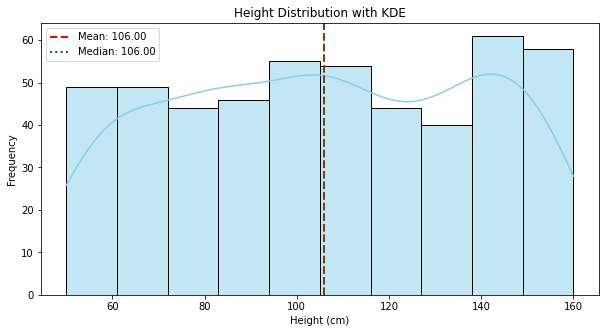

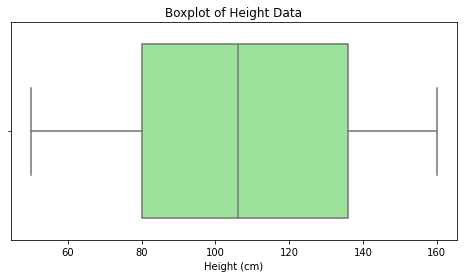

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# Step 1: Calculate mean, median, and skewness
mean_height = np.mean(df["Weight"])
median_height = np.median(df["Weight"])
skewness = skew(df["Weight"], bias=False)

# Print results for clarity
print(f"Mean: {mean_height:.2f}")
print(f"Median: {median_height:.2f}")
print(f"Skewness: {skewness:.4f}")

# Step 2: Plot Histogram with Mean and Median
plt.figure(figsize=(10, 5))
sns.histplot(df["Weight"], bins=10, kde=True, color='skyblue', edgecolor='black')
plt.axvline(mean_height, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_height:.2f}')
plt.axvline(median_height, color='green', linestyle='dotted', linewidth=2, label=f'Median: {median_height:.2f}')
plt.title('Height Distribution with KDE')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Step 3: Plot Boxplot to Check Outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=df["Weight"], color='lightgreen')
plt.title('Boxplot of Height Data')
plt.xlabel('Height (cm)')
plt.show()
#slight negative skew

Mean: 3.75
Median: 4.00
Skewness: -0.9278


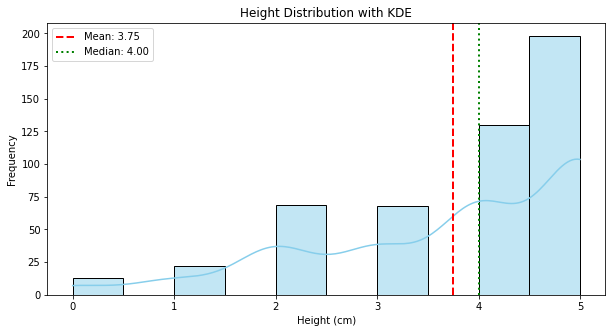

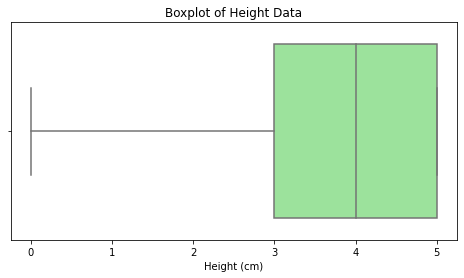

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# Step 1: Calculate mean, median, and skewness
mean_height = np.mean(df["Index"])
median_height = np.median(df["Index"])
skewness = skew(df["Index"], bias=False)

# Print results for clarity
print(f"Mean: {mean_height:.2f}")
print(f"Median: {median_height:.2f}")
print(f"Skewness: {skewness:.4f}")

# Step 2: Plot Histogram with Mean and Median
plt.figure(figsize=(10, 5))
sns.histplot(df["Index"], bins=10, kde=True, color='skyblue', edgecolor='black')
plt.axvline(mean_height, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_height:.2f}')
plt.axvline(median_height, color='green', linestyle='dotted', linewidth=2, label=f'Median: {median_height:.2f}')
plt.title('Height Distribution with KDE')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Step 3: Plot Boxplot to Check Outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=df["Index"], color='lightgreen')
plt.title('Boxplot of Height Data')
plt.xlabel('Height (cm)')
plt.show()
#slight negative skew

In [28]:
df.isna().sum()

Gender    0
Height    0
Weight    0
Index     0
dtype: int64

In [29]:
df.duplicated()
#As many can have same height weight so it doesnt matter

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Length: 500, dtype: bool

In [30]:
#Now checked outliers

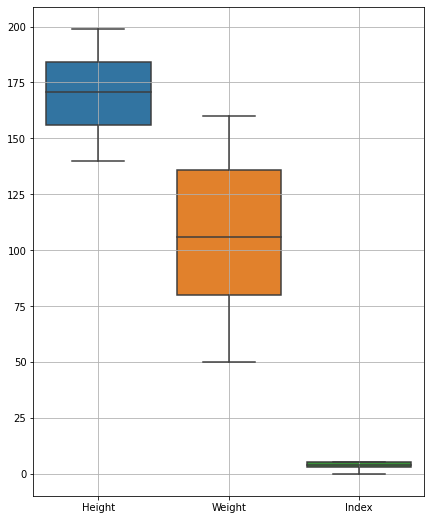

In [31]:
plt.figure(figsize=(7, 9))

# Create a boxplot
sns.boxplot(data=df)
plt.grid(True)
plt.show()

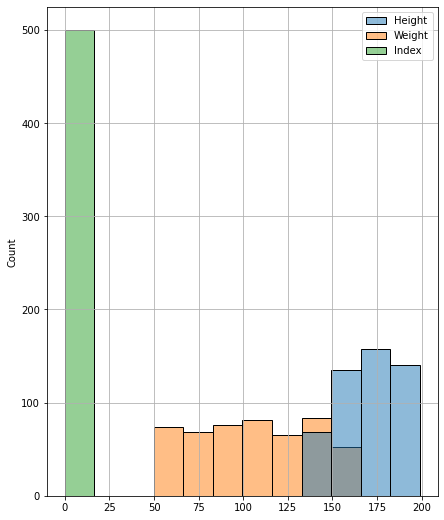

In [32]:
plt.figure(figsize=(7, 9))

# Create a boxplot
sns.histplot(data=df)
plt.grid(True)
plt.show()

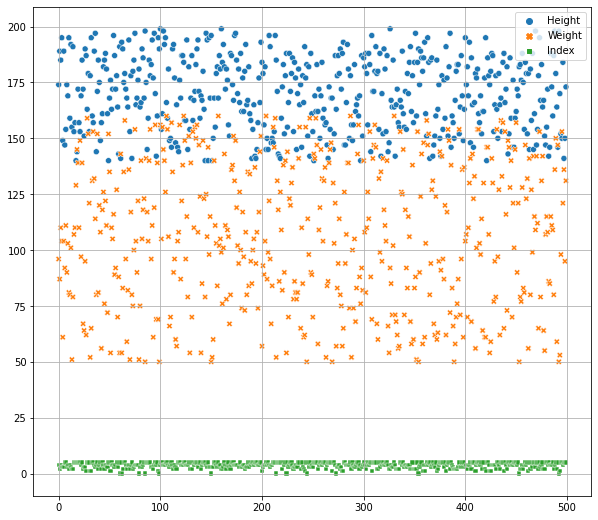

In [33]:
plt.figure(figsize=(10, 9))

# Create a boxplot
sns.scatterplot(data=df)
plt.grid(True)
plt.show()

In [34]:
#Lets see gender wise

In [35]:
df['Gender'].value_counts()

Female    255
Male      245
Name: Gender, dtype: int64

<AxesSubplot:>

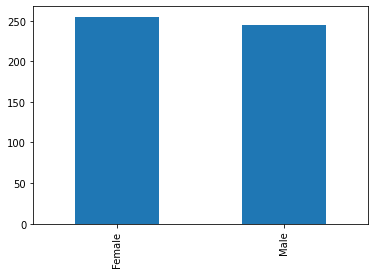

In [36]:
df['Gender'].value_counts().plot(kind='bar')

In [37]:
#Our target is balanced already so no need to fix anything
#let us visualise more

In [1]:
cat_columns = df.select_dtypes(include=['object']).columns
numeric_columns = df.select_dtypes(exclude=['object']).columns

##ploting
fig, axs = plt.subplots(1,len(numeric_columns), figsize=(9,6))

for i,column in enumerate(numeric_columns):
    
    axs[i].boxplot(df[column],patch_artist=True)
    axs[i].set_title(column)
    

fig.tight_layout() 
plt.show()

NameError: name 'df' is not defined

In [39]:
#Lets convert gender to categorical

In [40]:
from sklearn.preprocessing import LabelEncoder

# Assuming your DataFrame is named 'df'
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
#male -1
#female - 0
#alphabetically

In [41]:
#LETS TRY WITH KNN

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [43]:
df.head()

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3


In [44]:
X =df.drop('Index',axis =1)
X.head()

,Gender,Height,Weight
0,1,174,96
1,1,189,87
2,0,185,110
3,0,195,104
4,1,149,61


In [45]:
y= df['Index']
y.head()

0    4
1    2
2    4
3    3
4    3
Name: Index, dtype: int64

In [46]:
print(X.shape)
print(y.shape)

(500, 3)
(500,)


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
print("X train",X_train.shape)
print("y train",y_train.shape)
print("X test",X_test.shape)
print("y test",y_test.shape)

X train (400, 3)
y train (400,)
X test (100, 3)
y test (100,)


In [49]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# K-Nearest Neighbors (KNN) - Initially with K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

 print(f"Model: KNN")
    print("Accuracy Score:", accuracy_score(y_test, knn_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, knn_pred))
    print("Classification Report:\n", classification_report(y_test, knn_pred))
    print("------------------------------------------------------")


IndentationError: unexpected indent (<ipython-input-49-9248b7619e61>, line 9)

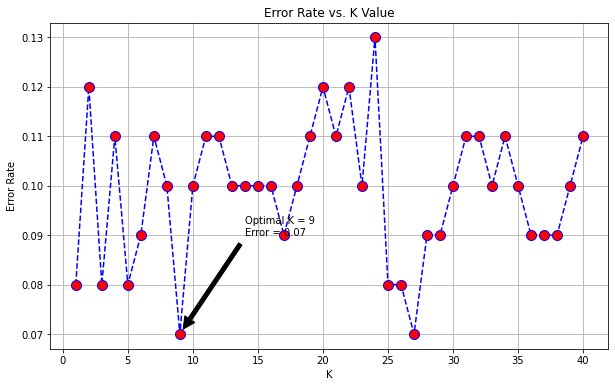

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

error_rate = []

# Try K values from 1 to 40
for i in range(1, 41):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))  # Error rate

# Find the optimal K with the lowest error rate
optimal_k = np.argmin(error_rate) + 1  # +1 because index starts from 0
min_error = error_rate[optimal_k - 1]   # Get corresponding error rate

# Plotting Error Rate vs. K Value
plt.figure(figsize=(10, 6))
plt.plot(range(1, 41), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid(True)

# Add annotation for the optimal K value
plt.annotate(f'Optimal K = {optimal_k}\nError = {min_error:.2f}', 
             xy=(optimal_k, min_error), 
             xytext=(optimal_k + 5, min_error + 0.02), 
             arrowprops=dict(facecolor='black', shrink=0.05))

# Show plot
plt.show()


In [51]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# K-Nearest Neighbors (KNN) - Initially with K=5
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

print(f"Model: KNN")
print("Accuracy Score:", accuracy_score(y_test, knn_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, knn_pred))
print("Classification Report:\n", classification_report(y_test, knn_pred))
print("------------------------------------------------------")


Model: KNN
Accuracy Score: 0.89
Confusion Matrix:
 [[ 0  1  0  0  0  0]
 [ 0  4  0  0  0  0]
 [ 0  2 15  1  0  0]
 [ 0  0  0  8  0  0]
 [ 0  0  1  2 24  3]
 [ 0  0  0  0  1 38]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.57      1.00      0.73         4
           2       0.94      0.83      0.88        18
           3       0.73      1.00      0.84         8
           4       0.96      0.80      0.87        30
           5       0.93      0.97      0.95        39

    accuracy                           0.89       100
   macro avg       0.69      0.77      0.71       100
weighted avg       0.90      0.89      0.89       100

------------------------------------------------------


C:\Users\Anil Sah\miniconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anil Sah\miniconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anil Sah\miniconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
#Check for outliers
df.head()

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3


In [53]:
df.shape

(500, 4)

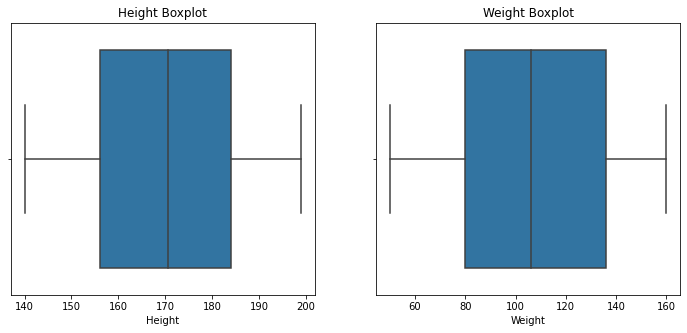

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(data=df, x='Height', ax=axes[0]).set_title('Height Boxplot')
sns.boxplot(data=df, x='Weight', ax=axes[1]).set_title('Weight Boxplot')
plt.show()

In [55]:
Q1 = df[['Height', 'Weight']].quantile(0.25)
Q3 = df[['Height', 'Weight']].quantile(0.75)
IQR = Q3 - Q1

# Define a filter to remove outliers
outlier_filter = ~((df[['Height', 'Weight']] < (Q1 - 1.5 * IQR)) |
                   (df[['Height', 'Weight']] > (Q3 + 1.5 * IQR))).any(axis=1)

df_cleaned = df[outlier_filter]
print("After Removing Outliers, Shape:", df_cleaned.shape)

After Removing Outliers, Shape: (500, 4)


In [56]:
#NO OUTLIERS

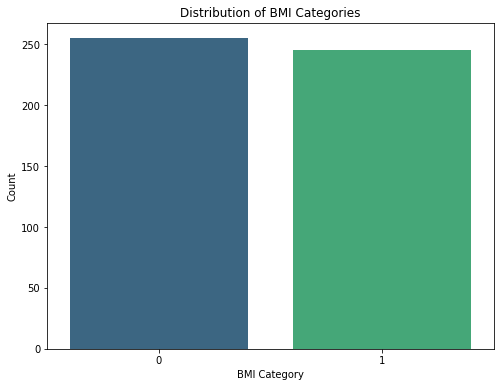

In [57]:
# Plot a bar chart to show the count of each BMI category
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', palette='viridis')
plt.title('Distribution of BMI Categories')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.show()

In [58]:
#BALNACED GENDER
print(df['Gender'].value_counts())
#0->Female
#1->male

0    255
1    245
Name: Gender, dtype: int64


In [59]:
#Boxplots to Explore Feature Distributions by BMI Category

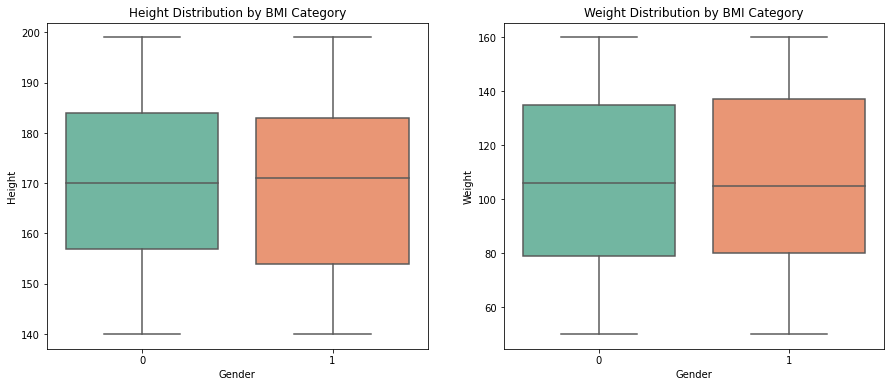

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.boxplot(data=df, x='Gender', y='Height', ax=axes[0], palette='Set2')
axes[0].set_title('Height Distribution by BMI Category')

sns.boxplot(data=df, x='Gender', y='Weight', ax=axes[1], palette='Set2')
axes[1].set_title('Weight Distribution by BMI Category')

plt.show()

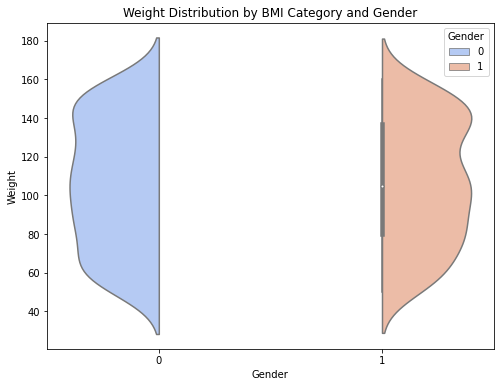

In [61]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='Gender', y='Weight', hue='Gender', split=True, palette='coolwarm')
plt.title('Weight Distribution by BMI Category and Gender')
plt.show()

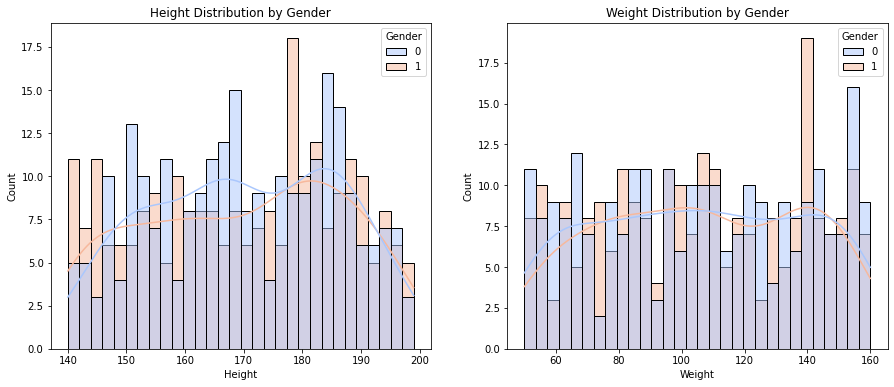

In [62]:
# Plot gender-specific distributions for Height and Weight
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(data=df, x='Height', hue='Gender', kde=True, bins=30, ax=axes[0], palette='coolwarm')
axes[0].set_title('Height Distribution by Gender')

sns.histplot(data=df, x='Weight', hue='Gender', kde=True, bins=30, ax=axes[1], palette='coolwarm')
axes[1].set_title('Weight Distribution by Gender')

plt.show()

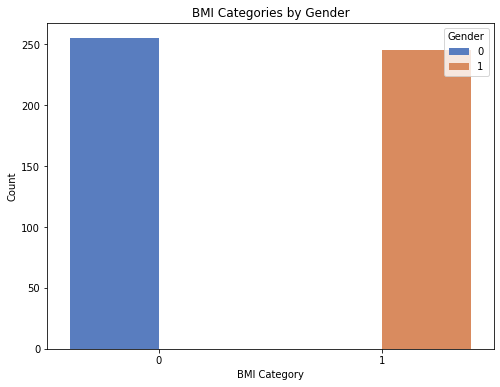

In [63]:
# Count plot showing the distribution of BMI categories by gender
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', hue='Gender', palette='muted')
plt.title('BMI Categories by Gender')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.show()

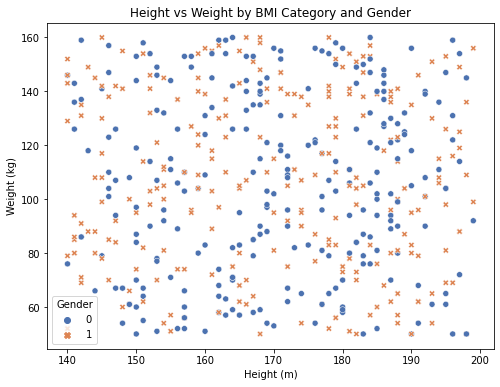

In [64]:
#Scatter plot to explore the relationship between height and weight
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Height', y='Weight', hue='Gender', style='Gender', palette='deep')
plt.title('Height vs Weight by BMI Category and Gender')
plt.xlabel('Height (m)')
plt.ylabel('Weight (kg)')
plt.show()

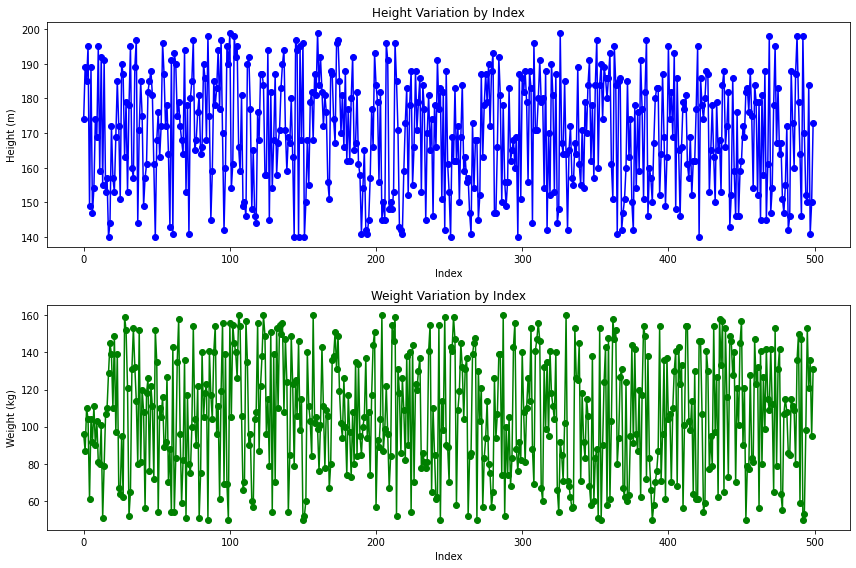

In [65]:
# Plot Height and Weight by index
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

ax[0].plot(df.index, df['Height'], marker='o', linestyle='-', color='blue')
ax[0].set_title('Height Variation by Index')
ax[0].set_xlabel('Index')
ax[0].set_ylabel('Height (m)')

ax[1].plot(df.index, df['Weight'], marker='o', linestyle='-', color='green')
ax[1].set_title('Weight Variation by Index')
ax[1].set_xlabel('Index')
ax[1].set_ylabel('Weight (kg)')

plt.tight_layout()
plt.show()

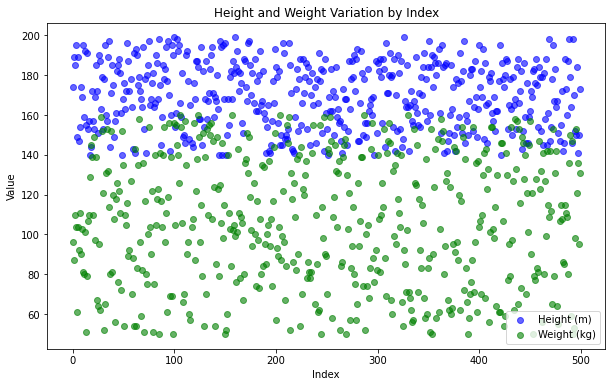

In [66]:
# Scatter plot for Height and Weight indexed by row number
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['Height'], label='Height (m)', color='blue', alpha=0.6)
plt.scatter(df.index, df['Weight'], label='Weight (kg)', color='green', alpha=0.6)
plt.title('Height and Weight Variation by Index')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

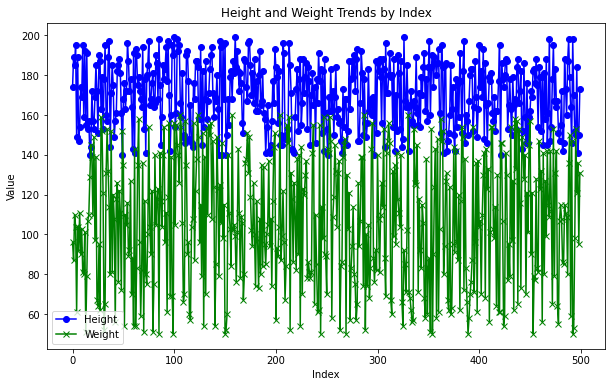

In [67]:
# Plot height and weight trends by index
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Height'], label='Height', marker='o', linestyle='-', color='blue')
plt.plot(df.index, df['Weight'], label='Weight', marker='x', linestyle='-', color='green')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Height and Weight Trends by Index')
plt.legend()
plt.show()

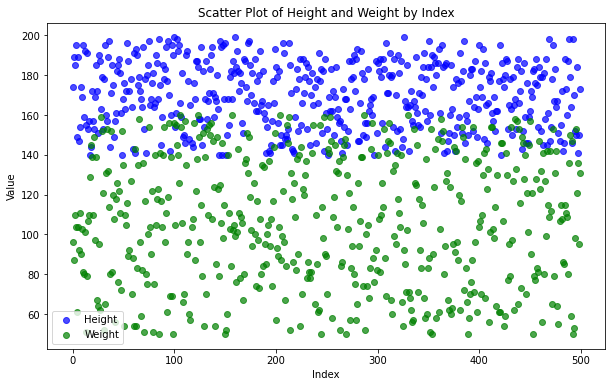

In [68]:
# Scatter plot for Height and Weight by index
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['Height'], label='Height', alpha=0.7, color='blue')
plt.scatter(df.index, df['Weight'], label='Weight', alpha=0.7, color='green')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Scatter Plot of Height and Weight by Index')
plt.legend()
plt.show()

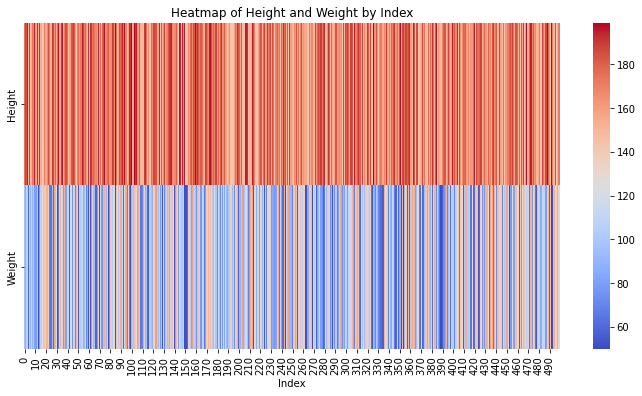

In [69]:
data_to_plot = df[['Height', 'Weight']]
data_to_plot.index.name = 'Index'

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(data_to_plot.T, cmap='coolwarm', annot=False, cbar=True)
plt.title('Heatmap of Height and Weight by Index')
plt.show()

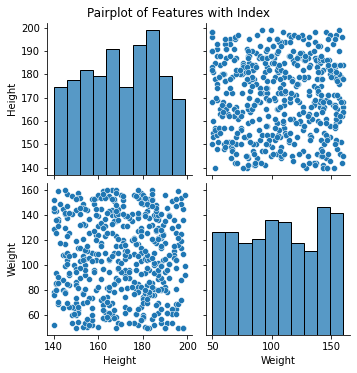

In [70]:
sns.pairplot(df[['Height', 'Weight']], kind='scatter')
plt.suptitle('Pairplot of Features with Index', y=1.02)
plt.show()

In [71]:
#_____

In [72]:
print("BMI Category Distribution:\n", df['Gender'].value_counts())

BMI Category Distribution:
 0    255
1    245
Name: Gender, dtype: int64


In [73]:
df[['Height','Weight']]

,Height,Weight
Index,,
0,174,96
1,189,87
2,185,110
3,195,104
4,149,61
...,...,...
495,150,153
496,184,121
497,141,136


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply normalization to Height and Weight columns
df[['Height', 'Weight']] = scaler.fit_transform(df[['Height', 'Weight']])

# Check normalized values
print(df[['Height', 'Weight']].head())

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply standardization to Height and Weight columns
df[['Height', 'Weight']] = scaler.fit_transform(df[['Height', 'Weight']])

# Check standardized values
print(df[['Height', 'Weight']].head())

In [ ]:
# Plot histograms for Height and Weight
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df['Height'], bins=20, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Height Distribution')

sns.histplot(df['Weight'], bins=20, kde=True, ax=axes[1], color='green')
axes[1].set_title('Weight Distribution')

plt.show()


In [74]:
#APLLYING CLASSIFICATION MODELS without scaled value

In [75]:
#KNN SVM

In [76]:
X =df.drop('Index',axis =1)
X.head()

,Gender,Height,Weight
Index,,,
0,1,174,96
1,1,189,87
2,0,185,110
3,0,195,104
4,1,149,61


In [77]:
y= df['Index']
y.head()

Index
0    4
1    2
2    4
3    3
4    3
Name: Index, dtype: int64

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
print("X train",X_train.shape)
print("y train",y_train.shape)
print("X test",X_test.shape)
print("y test",y_test.shape)

X train (400, 3)
y train (400,)
X test (100, 3)
y test (100,)


In [81]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [82]:
# Support Vector Machine (SVM)
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

# K-Nearest Neighbors (KNN) - Initially with K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# Evaluation
def evaluate_model(y_test, predictions, model_name):
    print(f"Model: {model_name}")
    print("Accuracy Score:", accuracy_score(y_test, predictions))
    print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
    print("Classification Report:\n", classification_report(y_test, predictions))
    print("------------------------------------------------------")


evaluate_model(y_test, svm_pred, "SVM")
evaluate_model(y_test, knn_pred, "KNN")


Model: SVM
Accuracy Score: 0.85
Confusion Matrix:
 [[ 0  0  1  0  0  0]
 [ 0  0  4  0  0  0]
 [ 0  0 18  0  0  0]
 [ 0  0  2  6  0  0]
 [ 0  0  2  4 23  1]
 [ 0  0  0  0  1 38]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         4
           2       0.67      1.00      0.80        18
           3       0.60      0.75      0.67         8
           4       0.96      0.77      0.85        30
           5       0.97      0.97      0.97        39

    accuracy                           0.85       100
   macro avg       0.53      0.58      0.55       100
weighted avg       0.84      0.85      0.83       100

------------------------------------------------------
Model: KNN
Accuracy Score: 0.92
Confusion Matrix:
 [[ 1  0  0  0  0  0]
 [ 0  4  0  0  0  0]
 [ 0  1 17  0  0  0]
 [ 0  0  0  8  0  0]
 [ 0  0  0  2 25  3]
 [ 0  0  0  0  2 37]]
Classification Report:

C:\Users\Anil Sah\miniconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anil Sah\miniconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anil Sah\miniconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [90]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Output the accuracy
print(f"Accuracy: {accuracy}")

precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Output the precision, recall, and F1 score
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.78
Precision: 0.7364188443135812
Recall: 0.7587250712250713
F1 Score: 0.7443039416723627


C:\Users\Anil Sah\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [91]:
#LETS SCALE

In [92]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Support Vector Machine (SVM)
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

# K-Nearest Neighbors (KNN) - Initially with K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# Evaluation
def evaluate_model(y_test, predictions, model_name):
    print(f"Model: {model_name}")
    print("Accuracy Score:", accuracy_score(y_test, predictions))
    print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
    print("Classification Report:\n", classification_report(y_test, predictions))
    print("------------------------------------------------------")


evaluate_model(y_test, svm_pred, "SVM")
evaluate_model(y_test, knn_pred, "KNN")


Model: SVM
Accuracy Score: 0.89
Confusion Matrix:
 [[ 0  1  0  0  0  0]
 [ 0  4  0  0  0  0]
 [ 0  2 16  0  0  0]
 [ 0  0  2  6  0  0]
 [ 0  0  0  3 26  1]
 [ 0  0  0  0  2 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.57      1.00      0.73         4
           2       0.89      0.89      0.89        18
           3       0.67      0.75      0.71         8
           4       0.93      0.87      0.90        30
           5       0.97      0.95      0.96        39

    accuracy                           0.89       100
   macro avg       0.67      0.74      0.70       100
weighted avg       0.89      0.89      0.89       100

------------------------------------------------------
Model: KNN
Accuracy Score: 0.89
Confusion Matrix:
 [[ 0  1  0  0  0  0]
 [ 0  4  0  0  0  0]
 [ 0  1 16  1  0  0]
 [ 0  0  0  8  0  0]
 [ 0  0  1  2 24  3]
 [ 0  0  0  0  2 37]]
Classification Report:

C:\Users\Anil Sah\miniconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anil Sah\miniconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anil Sah\miniconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\A

In [95]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Output the accuracy
print(f"Accuracy: {accuracy}")

precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Output the precision, recall, and F1 score
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.92
Precision: 0.7220306513409961
Recall: 0.7369301994301994
F1 Score: 0.7289326932470287


C:\Users\Anil Sah\miniconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [97]:
precision = precision_score(y_test, y_pred, average='macro', zero_division=1)
recall = recall_score(y_test, y_pred, average='macro', zero_division=1)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=1)
# Output the precision, recall, and F1 score
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 0.8886973180076628
Recall: 0.7369301994301994
F1 Score: 0.7289326932470287


In [100]:
#NORMALISATION
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler




In [101]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Support Vector Machine (SVM)
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

# K-Nearest Neighbors (KNN) - Initially with K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# Evaluation
def evaluate_model(y_test, predictions, model_name):
    print(f"Model: {model_name}")
    print("Accuracy Score:", accuracy_score(y_test, predictions))
    print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
    print("Classification Report:\n", classification_report(y_test, predictions))
    print("------------------------------------------------------")


evaluate_model(y_test, svm_pred, "SVM")
evaluate_model(y_test, knn_pred, "KNN")


Model: SVM
Accuracy Score: 0.93
Confusion Matrix:
 [[ 0  1  0  0  0  0]
 [ 0  4  0  0  0  0]
 [ 0  0 18  0  0  0]
 [ 0  0  2  6  0  0]
 [ 0  0  0  0 28  2]
 [ 0  0  0  0  2 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.80      1.00      0.89         4
           2       0.90      1.00      0.95        18
           3       1.00      0.75      0.86         8
           4       0.93      0.93      0.93        30
           5       0.95      0.95      0.95        39

    accuracy                           0.93       100
   macro avg       0.76      0.77      0.76       100
weighted avg       0.92      0.93      0.92       100

------------------------------------------------------
Model: KNN
Accuracy Score: 0.88
Confusion Matrix:
 [[ 0  1  0  0  0  0]
 [ 0  4  0  0  0  0]
 [ 0  1 16  1  0  0]
 [ 0  0  0  8  0  0]
 [ 0  0  1  3 23  3]
 [ 0  0  0  0  2 37]]
Classification Report:

C:\Users\Anil Sah\miniconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anil Sah\miniconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anil Sah\miniconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\A

In [102]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score


scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Output the accuracy
print(f"Accuracy: {accuracy}")

precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Output the precision, recall, and F1 score
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.7
Precision: 0.35732142857142857
Recall: 0.3833333333333333
F1 Score: 0.3671409050719396


C:\Users\Anil Sah\miniconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


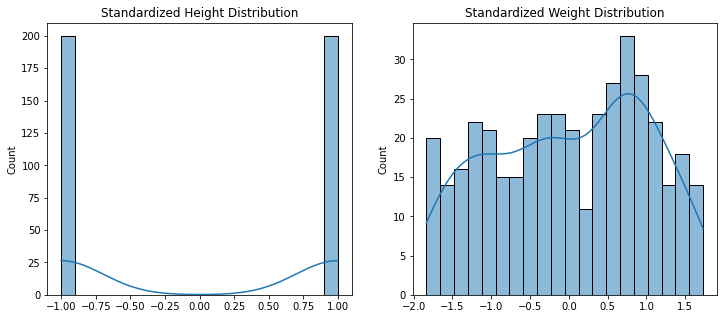

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Plot the distributions of standardized height and weight
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(X_train_scaled[:, 0], kde=True, bins=20)
plt.title("Standardized Height Distribution")

plt.subplot(1, 2, 2)
sns.histplot(X_train_scaled[:, 1], kde=True, bins=20)
plt.title("Standardized Weight Distribution")

plt.show()


In [104]:
#Gender specific 

In [105]:
df_male = df[df['Gender'] == 0]  # Assuming 0 represents male
df_female = df[df['Gender'] == 1]  # Assuming 1 represents female

In [106]:
df_male.head()

,Gender,Height,Weight,Index
Index,,,,
2,0,185,110,4
3,0,195,104,3
9,0,169,103,4
11,0,159,80,4
12,0,192,101,3


In [107]:
df_male.shape

(255, 4)

In [108]:
df_female.shape

(245, 4)

In [109]:
df['Gender'].value_counts()

0    255
1    245
Name: Gender, dtype: int64

In [110]:
X_male = df_male.drop('Index',axis=1)

In [111]:
X_male.head()

,Gender,Height,Weight
Index,,,
2,0,185,110
3,0,195,104
9,0,169,103
11,0,159,80
12,0,192,101


In [112]:
y_male = df_male['Index']
y_male

Index
2      4
3      3
9      4
11     4
12     3
      ..
492    0
493    1
495    5
496    4
497    5
Name: Index, Length: 255, dtype: int64

In [113]:
print(X_male.shape)
print(y_male.shape)

(255, 3)
(255,)


In [116]:
X_female = df_female.drop('Index',axis=1)
y_female = df_female['Index']
print(X_female.head())
print(y_female.head())

       Gender  Height  Weight
Index                        
0           1     174      96
1           1     189      87
4           1     149      61
5           1     189     104
6           1     147      92
Index
0    4
1    2
4    3
5    3
6    5
Name: Index, dtype: int64


In [117]:
print(X_female.shape)
print(y_female.shape)

(245, 3)
(245,)


In [118]:
X_train_male, X_test_male, y_train_male, y_test_male = train_test_split(X_male, y_male, test_size=0.2, random_state=42)

# Train the model for males
model_male = LogisticRegression(max_iter=1000)
model_male.fit(X_train_male, y_train_male)

# Predict for males
y_pred_male = model_male.predict(X_test_male)

# Evaluate the male model
print("Male Model Evaluation:")
print(confusion_matrix(y_test_male, y_pred_male))
print(classification_report(y_test_male, y_pred_male))

# Repeat the process for females
X_train_female, X_test_female, y_train_female, y_test_female = train_test_split(X_female, y_female, test_size=0.2, random_state=42)

# Train the model for females
model_female = LogisticRegression(max_iter=1000)
model_female.fit(X_train_female, y_train_female)

# Predict for females
y_pred_female = model_female.predict(X_test_female)

# Evaluate the female model
print("Female Model Evaluation:")
print(confusion_matrix(y_test_female, y_pred_female))
print(classification_report(y_test_female, y_pred_female))

C:\Users\Anil Sah\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Anil Sah\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

Male Model Evaluation:
[[ 1  1  0  0  0]
 [ 0  5  0  1  0]
 [ 0  4  6  0  0]
 [ 0  0  0 12  0]
 [ 0  0  0  0 21]]
              precision    recall  f1-score   support

           1       1.00      0.50      0.67         2
           2       0.50      0.83      0.62         6
           3       1.00      0.60      0.75        10
           4       0.92      1.00      0.96        12
           5       1.00      1.00      1.00        21

    accuracy                           0.88        51
   macro avg       0.88      0.79      0.80        51
weighted avg       0.92      0.88      0.88        51

Female Model Evaluation:
[[ 1  0  0  0  0  0]
 [ 0  4  1  0  0  0]
 [ 0  1  6  0  0  0]
 [ 0  0  0  8  1  0]
 [ 0  0  0  1  9  0]
 [ 0  0  0  0  0 17]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.80      0.80      0.80         5
           2       0.86      0.86      0.86         7
           3       0.89     

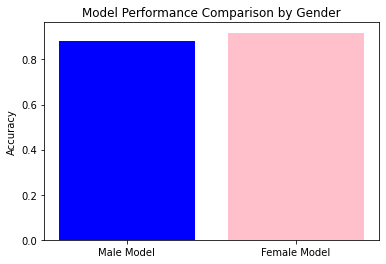

In [119]:
labels = ['Male Model', 'Female Model']
accuracies = [accuracy_score(y_test_male, y_pred_male), accuracy_score(y_test_female, y_pred_female)]

plt.bar(labels, accuracies, color=['blue', 'pink'])
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison by Gender')
plt.show()

In [120]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data for males
X_male_scaled = scaler.fit_transform(X_male)

# Fit and transform the data for females
X_female_scaled = scaler.fit_transform(X_female)

In [121]:
# Split the scaled data into training and testing sets for males
X_train_male, X_test_male, y_train_male, y_test_male = train_test_split(X_male_scaled, y_male, test_size=0.2, random_state=42)

# Train the model for males
model_male = LogisticRegression(max_iter=1000)
model_male.fit(X_train_male, y_train_male)

# Predict for males
y_pred_male = model_male.predict(X_test_male)

# Evaluate the male model
print("Male Model Evaluation:")
print(confusion_matrix(y_test_male, y_pred_male))
print(classification_report(y_test_male, y_pred_male))

# Repeat the process for females using scaled features
X_train_female, X_test_female, y_train_female, y_test_female = train_test_split(X_female_scaled, y_female, test_size=0.2, random_state=42)

# Train the model for females
model_female = LogisticRegression(max_iter=1000)
model_female.fit(X_train_female, y_train_female)

# Predict for females
y_pred_female = model_female.predict(X_test_female)

# Evaluate the female model
print("Female Model Evaluation:")
print(confusion_matrix(y_test_female, y_pred_female))
print(classification_report(y_test_female, y_pred_female))

Male Model Evaluation:
[[ 0  2  0  0  0]
 [ 0  5  0  1  0]
 [ 0  4  3  3  0]
 [ 0  0  0 12  0]
 [ 0  0  0  0 21]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.45      0.83      0.59         6
           3       1.00      0.30      0.46        10
           4       0.75      1.00      0.86        12
           5       1.00      1.00      1.00        21

    accuracy                           0.80        51
   macro avg       0.64      0.63      0.58        51
weighted avg       0.84      0.80      0.77        51

Female Model Evaluation:
[[ 0  1  0  0  0  0]
 [ 0  0  5  0  0  0]
 [ 0  0  7  0  0  0]
 [ 0  0  0  5  4  0]
 [ 0  0  0  0 10  0]
 [ 0  0  0  0  0 17]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         5
           2       0.58      1.00      0.74         7
           3       1.00     

C:\Users\Anil Sah\miniconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anil Sah\miniconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anil Sah\miniconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\A

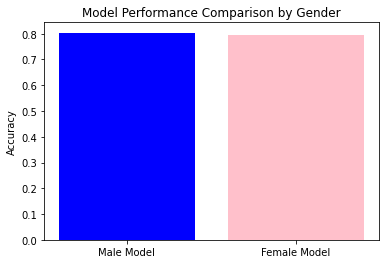

In [122]:
labels = ['Male Model', 'Female Model']
accuracies = [accuracy_score(y_test_male, y_pred_male), accuracy_score(y_test_female, y_pred_female)]

plt.bar(labels, accuracies, color=['blue', 'pink'])
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison by Gender')
plt.show()

In [125]:
#KNN SVM
X_male = df_male.drop('Index',axis=1)
y_male = df_male['Index']
print(X_male.shape)
print(y_male.shape)

(255, 3)
(255,)


In [126]:
X_female = df_female.drop('Index',axis=1)
y_female = df_female['Index']
print(X_female.shape)
print(y_female.shape)

(245, 3)
(245,)


In [127]:
X_train, X_test, y_train, y_test = train_test_split(X_male, y_male, test_size=0.2, random_state=42)

In [149]:
#male
# Support Vector Machine (SVM)
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

# K-Nearest Neighbors (KNN) - Initially with K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# Evaluation
def evaluate_model(y_test, predictions, model_name):
    print(f"Model: {model_name}")
    print("Accuracy Score:", accuracy_score(y_test, predictions))
    print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
    print("Classification Report:\n", classification_report(y_test, predictions))
    print("------------------------------------------------------")


evaluate_model(y_test, svm_pred, "SVM")
evaluate_model(y_test, knn_pred, "KNN")

Model: SVM
Accuracy Score: 0.673469387755102
Confusion Matrix:
 [[ 0  0  1  0  0  0]
 [ 0  0  5  0  0  0]
 [ 0  0  7  0  0  0]
 [ 0  0  4  0  5  0]
 [ 0  0  0  0  9  1]
 [ 0  0  0  0  0 17]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         5
           2       0.41      1.00      0.58         7
           3       0.00      0.00      0.00         9
           4       0.64      0.90      0.75        10
           5       0.94      1.00      0.97        17

    accuracy                           0.67        49
   macro avg       0.33      0.48      0.38        49
weighted avg       0.52      0.67      0.57        49

------------------------------------------------------
Model: KNN
Accuracy Score: 0.9183673469387755
Confusion Matrix:
 [[ 1  0  0  0  0  0]
 [ 0  5  0  0  0  0]
 [ 0  0  7  0  0  0]
 [ 0  0  2  6  1  0]
 [ 0  0  0  0  9  1]
 [ 0  0  0  0  0 

C:\Users\Anil Sah\miniconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anil Sah\miniconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anil Sah\miniconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [129]:
# Repeat the process for females
X_train, X_test, y_train, y_test = train_test_split(X_female, y_female, test_size=0.2, random_state=42)

In [130]:
#female
# Support Vector Machine (SVM)
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

# K-Nearest Neighbors (KNN) - Initially with K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# Evaluation
def evaluate_model(y_test, predictions, model_name):
    print(f"Model: {model_name}")
    print("Accuracy Score:", accuracy_score(y_test, predictions))
    print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
    print("Classification Report:\n", classification_report(y_test, predictions))
    print("------------------------------------------------------")


evaluate_model(y_test, svm_pred, "SVM")
evaluate_model(y_test, knn_pred, "KNN")

Model: SVM
Accuracy Score: 0.673469387755102
Confusion Matrix:
 [[ 0  0  1  0  0  0]
 [ 0  0  5  0  0  0]
 [ 0  0  7  0  0  0]
 [ 0  0  4  0  5  0]
 [ 0  0  0  0  9  1]
 [ 0  0  0  0  0 17]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         5
           2       0.41      1.00      0.58         7
           3       0.00      0.00      0.00         9
           4       0.64      0.90      0.75        10
           5       0.94      1.00      0.97        17

    accuracy                           0.67        49
   macro avg       0.33      0.48      0.38        49
weighted avg       0.52      0.67      0.57        49

------------------------------------------------------
Model: KNN
Accuracy Score: 0.9183673469387755
Confusion Matrix:
 [[ 1  0  0  0  0  0]
 [ 0  5  0  0  0  0]
 [ 0  0  7  0  0  0]
 [ 0  0  2  6  1  0]
 [ 0  0  0  0  9  1]
 [ 0  0  0  0  0 

C:\Users\Anil Sah\miniconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anil Sah\miniconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anil Sah\miniconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [131]:
#SCALED
X_male.head()

,Gender,Height,Weight
Index,,,
2,0,185,110
3,0,195,104
9,0,169,103
11,0,159,80
12,0,192,101


In [133]:
print(y_male.head())

Index
2     4
3     3
9     4
11    4
12    3
Name: Index, dtype: int64


In [132]:
X_female.head()

,Gender,Height,Weight
Index,,,
0,1,174,96
1,1,189,87
4,1,149,61
5,1,189,104
6,1,147,92


In [134]:
print(y_female.head())

Index
0    4
1    2
4    3
5    3
6    5
Name: Index, dtype: int64


In [146]:
scaler = StandardScaler()

# Fit and transform the data for males
X_male_scaled = scaler.fit_transform(X_male)

# Fit and transform the data for females
X_female_scaled = scaler.fit_transform(X_female)

# Split the scaled data into training and testing sets for males
X_train_male, X_test_male, y_train_male, y_test_male = train_test_split(X_male_scaled, y_male, test_size=0.2, random_state=42)

# Repeat the process for females using scaled features
X_train_female, X_test_female, y_train_female, y_test_female = train_test_split(X_female_scaled, y_female, test_size=0.2, random_state=42)

# Function to train and evaluate a model
def train_and_evaluate(X_train, y_train, X_test, y_test, model_name):
    # Support Vector Machine (SVM)
    svm = SVC()
    svm.fit(X_train, y_train)
    svm_pred = svm.predict(X_test)
    
    # K-Nearest Neighbors (KNN) - Initially with K=5
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    knn_pred = knn.predict(X_test)

    # Evaluation function
    def evaluate_model(y_test, predictions, model_name):
        print(f"Model: {model_name}")
        print("Accuracy Score:", accuracy_score(y_test, predictions))
        print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
        print("Classification Report:\n", classification_report(y_test, predictions))
        print("------------------------------------------------------")

    # Evaluate SVM
    evaluate_model(y_test, svm_pred, "SVM")

    # Evaluate KNN
    evaluate_model(y_test, knn_pred, "KNN")


print("Male Model Evaluation:")
train_and_evaluate(X_train_male, y_train_male, X_test_male, y_test_male, "Male")

# Train and evaluate for females
print("Female Model Evaluation:")

train_and_evaluate(X_train_female, y_train_female, X_test_female, y_test_female, "Female")


Male Model Evaluation:
Model: SVM
Accuracy Score: 0.8235294117647058
Confusion Matrix:
 [[ 0  2  0  0  0]
 [ 0  5  0  1  0]
 [ 0  5  4  1  0]
 [ 0  0  0 12  0]
 [ 0  0  0  0 21]]
Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.42      0.83      0.56         6
           3       1.00      0.40      0.57        10
           4       0.86      1.00      0.92        12
           5       1.00      1.00      1.00        21

    accuracy                           0.82        51
   macro avg       0.65      0.65      0.61        51
weighted avg       0.86      0.82      0.81        51

------------------------------------------------------
Model: KNN
Accuracy Score: 0.8431372549019608
Confusion Matrix:
 [[ 0  2  0  0  0]
 [ 0  5  0  1  0]
 [ 0  3  6  1  0]
 [ 0  0  0 12  0]
 [ 0  0  0  1 20]]
Classification Report:
               precision    recall  f1-score   support

           1      

C:\Users\Anil Sah\miniconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anil Sah\miniconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anil Sah\miniconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\A

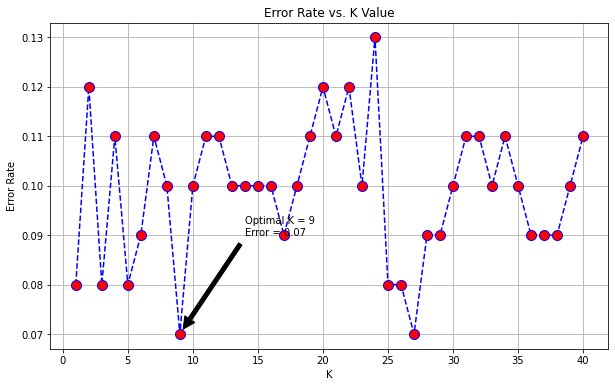

In [155]:
error_rate = []

# Try K values from 1 to 40
for i in range(1, 41):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))  # Error rate

# Find the optimal K with the lowest error rate
optimal_k = np.argmin(error_rate) + 1  # +1 because index starts from 0
min_error = error_rate[optimal_k - 1]   # Get corresponding error rate

# Plotting Error Rate vs. K Value
plt.figure(figsize=(10, 6))
plt.plot(range(1, 41), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid(True)

# Add annotation for the optimal K value
plt.annotate(f'Optimal K = {optimal_k}\nError = {min_error:.2f}', 
             xy=(optimal_k, min_error), 
             xytext=(optimal_k + 5, min_error + 0.02), 
             arrowprops=dict(facecolor='black', shrink=0.05))

# Show plot
plt.show()


In [137]:
#dynamic without scaled :

In [144]:

# Split the scaled data into training and testing sets for males
X_train_male, X_test_male, y_train_male, y_test_male = train_test_split(X_male, y_male, test_size=0.2, random_state=42)

# Repeat the process for females using scaled features
X_train_female, X_test_female, y_train_female, y_test_female = train_test_split(X_female, y_female, test_size=0.2, random_state=42)

# Function to train and evaluate a model
def train_and_evaluate(X_train, y_train, X_test, y_test, model_name):
    # Support Vector Machine (SVM)
    svm = SVC()
    svm.fit(X_train, y_train)
    svm_pred = svm.predict(X_test)
    
    # K-Nearest Neighbors (KNN) - Initially with K=5
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    knn_pred = knn.predict(X_test)

    # Evaluation function
    def evaluate_model(y_test, predictions, model_name):
        print(f"Model: {model_name}")
        print("Accuracy Score:", accuracy_score(y_test, predictions))
        print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
        print("Classification Report:\n", classification_report(y_test, predictions))
        print("------------------------------------------------------")

    # Evaluate SVM
    evaluate_model(y_test, svm_pred, "SVM")

    # Evaluate KNN
    evaluate_model(y_test, knn_pred, "KNN")


print("Male Model Evaluation:")
train_and_evaluate(X_train_male, y_train_male, X_test_male, y_test_male, "Male")

# Train and evaluate for females
print("Female Model Evaluation:")
train_and_evaluate(X_train_female, y_train_female, X_test_female, y_test_female, "Female")


Male Model Evaluation:
Model: SVM
Accuracy Score: 0.7058823529411765
Confusion Matrix:
 [[ 0  2  0  0  0]
 [ 0  5  0  1  0]
 [ 0  7  0  3  0]
 [ 0  1  0 11  0]
 [ 0  0  0  1 20]]
Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.33      0.83      0.48         6
           3       0.00      0.00      0.00        10
           4       0.69      0.92      0.79        12
           5       1.00      0.95      0.98        21

    accuracy                           0.71        51
   macro avg       0.40      0.54      0.45        51
weighted avg       0.61      0.71      0.64        51

------------------------------------------------------
Model: KNN
Accuracy Score: 0.8431372549019608
Confusion Matrix:
 [[ 0  2  0  0  0]
 [ 0  5  0  1  0]
 [ 0  2  6  2  0]
 [ 0  0  0 12  0]
 [ 0  0  0  1 20]]
Classification Report:
               precision    recall  f1-score   support

           1      

C:\Users\Anil Sah\miniconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anil Sah\miniconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anil Sah\miniconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\A

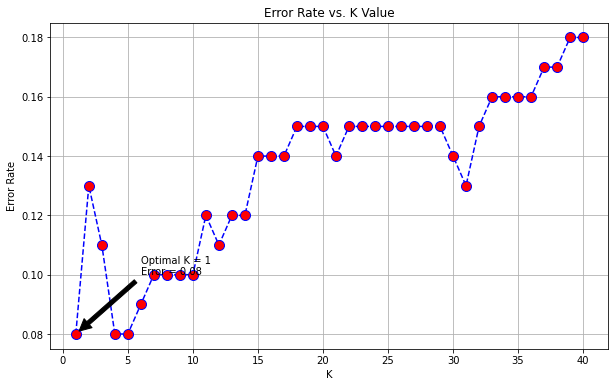

In [152]:
error_rate = []

# Try K values from 1 to 40
for i in range(1, 41):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_male, y_train_male)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))  # Error rate

# Find the optimal K with the lowest error rate
optimal_k = np.argmin(error_rate) + 1  # +1 because index starts from 0
min_error = error_rate[optimal_k - 1]   # Get corresponding error rate

# Plotting Error Rate vs. K Value
plt.figure(figsize=(10, 6))
plt.plot(range(1, 41), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid(True)

# Add annotation for the optimal K value
plt.annotate(f'Optimal K = {optimal_k}\nError = {min_error:.2f}', 
             xy=(optimal_k, min_error), 
             xytext=(optimal_k + 5, min_error + 0.02), 
             arrowprops=dict(facecolor='black', shrink=0.05))

# Show plot
plt.show()


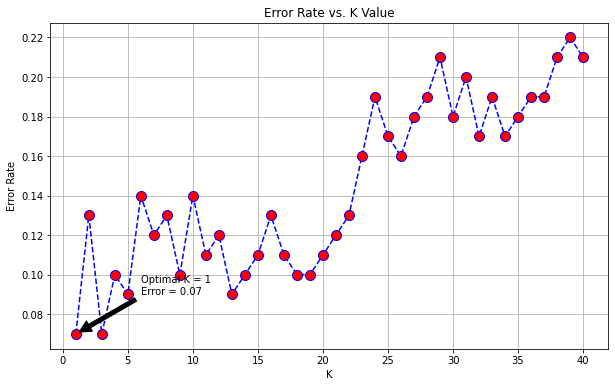

In [153]:
error_rate = []

# Try K values from 1 to 40
for i in range(1, 41):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_female, y_train_female)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))  # Error rate

# Find the optimal K with the lowest error rate
optimal_k = np.argmin(error_rate) + 1  # +1 because index starts from 0
min_error = error_rate[optimal_k - 1]   # Get corresponding error rate

# Plotting Error Rate vs. K Value
plt.figure(figsize=(10, 6))
plt.plot(range(1, 41), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid(True)

# Add annotation for the optimal K value
plt.annotate(f'Optimal K = {optimal_k}\nError = {min_error:.2f}', 
             xy=(optimal_k, min_error), 
             xytext=(optimal_k + 5, min_error + 0.02), 
             arrowprops=dict(facecolor='black', shrink=0.05))

# Show plot
plt.show()


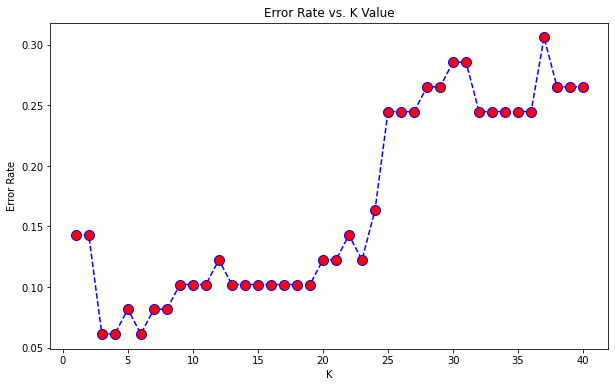

In [142]:
error_rate = []

# Will try K values from 1 to 40
for i in range(1, 41):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

# Plotting error rate vs. K value
plt.figure(figsize=(10, 6))
plt.plot(range(1, 41), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()


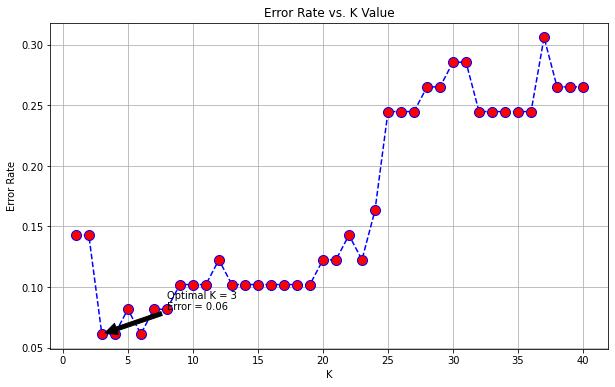

In [143]:
error_rate = []

# Try K values from 1 to 40
for i in range(1, 41):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))  # Error rate

# Find the optimal K with the lowest error rate
optimal_k = np.argmin(error_rate) + 1  # +1 because index starts from 0
min_error = error_rate[optimal_k - 1]   # Get corresponding error rate

# Plotting Error Rate vs. K Value
plt.figure(figsize=(10, 6))
plt.plot(range(1, 41), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid(True)

# Add annotation for the optimal K value
plt.annotate(f'Optimal K = {optimal_k}\nError = {min_error:.2f}', 
             xy=(optimal_k, min_error), 
             xytext=(optimal_k + 5, min_error + 0.02), 
             arrowprops=dict(facecolor='black', shrink=0.05))

# Show plot
plt.show()


In [148]:

# Split the scaled data into training and testing sets for males
X_train_male, X_test_male, y_train_male, y_test_male = train_test_split(X_male, y_male, test_size=0.2, random_state=42)

# Repeat the process for females using scaled features
X_train_female, X_test_female, y_train_female, y_test_female = train_test_split(X_female, y_female, test_size=0.2, random_state=42)

# Function to train and evaluate a model
def train_and_evaluate(X_train, y_train, X_test, y_test, model_name):
    # Support Vector Machine (SVM)
    svm = SVC()
    svm.fit(X_train, y_train)
    svm_pred = svm.predict(X_test)
    
    # K-Nearest Neighbors (KNN) - Initially with K=5
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)
    knn_pred = knn.predict(X_test)

    # Evaluation function
    def evaluate_model(y_test, predictions, model_name):
        print(f"Model: {model_name}")
        print("Accuracy Score:", accuracy_score(y_test, predictions))
        print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
        print("Classification Report:\n", classification_report(y_test, predictions))
        print("------------------------------------------------------")

    # Evaluate SVM
    evaluate_model(y_test, svm_pred, "SVM")

    # Evaluate KNN
    evaluate_model(y_test, knn_pred, "KNN")


print("Male Model Evaluation:")
train_and_evaluate(X_train_male, y_train_male, X_test_male, y_test_male, "Male")

# Train and evaluate for females
print("Female Model Evaluation:")
train_and_evaluate(X_train_female, y_train_female, X_test_female, y_test_female, "Female")


Male Model Evaluation:
Model: SVM
Accuracy Score: 0.7058823529411765
Confusion Matrix:
 [[ 0  2  0  0  0]
 [ 0  5  0  1  0]
 [ 0  7  0  3  0]
 [ 0  1  0 11  0]
 [ 0  0  0  1 20]]
Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.33      0.83      0.48         6
           3       0.00      0.00      0.00        10
           4       0.69      0.92      0.79        12
           5       1.00      0.95      0.98        21

    accuracy                           0.71        51
   macro avg       0.40      0.54      0.45        51
weighted avg       0.61      0.71      0.64        51

------------------------------------------------------
Model: KNN
Accuracy Score: 0.8823529411764706
Confusion Matrix:
 [[ 1  1  0  0  0]
 [ 0  5  0  1  0]
 [ 0  2  6  2  0]
 [ 0  0  0 12  0]
 [ 0  0  0  0 21]]
Classification Report:
               precision    recall  f1-score   support

           1      

C:\Users\Anil Sah\miniconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anil Sah\miniconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anil Sah\miniconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\A

In [159]:
from sklearn.model_selection import GridSearchCV
#NOT SCALED
# Split the scaled data into training and testing sets for males
X_train_male, X_test_male, y_train_male, y_test_male = train_test_split(X_male, y_male, test_size=0.2, random_state=42)

# Repeat the process for females using scaled features
X_train_female, X_test_female, y_train_female, y_test_female = train_test_split(X_female, y_female, test_size=0.2, random_state=42)

In [ ]:
# Define a range of parameters for GridSearch
param_grid = {
    'C': [0.1, 1, 10, 100],  # Experiment with more values as needed
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4],  # Relevant for poly kernel
    'gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf', 'poly'
}

svm = SVC()
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train_male, y_train_male)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validated score:", grid_search.best_score_)

# Evaluate the best model found by GridSearchCV on the test set
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test_male)
print("Accuracy on test set:", accuracy_score(y_test_male, predictions))


In [ ]:
# Define a range of parameters for GridSearch
param_grid = {
    'C': [0.1, 1, 10, 100],  # Experiment with more values as needed
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4],  # Relevant for poly kernel
    'gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf', 'poly'
}

svm = SVC()
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train_female, y_train_female)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validated score:", grid_search.best_score_)

# Evaluate the best model found by GridSearchCV on the test set
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test_female)
print("Accuracy on test set:", accuracy_score(y_test_female, predictions))